In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
def load_data():
  data = pd.read_csv(r"hasil_preprosesing.csv", encoding='latin-1')
  return data

In [ ]:
data = load_data()
data.head()

berita    kategori
0  ['daftar', 'serta', 'didik', 'ppd', 'kota', 's...  pendidikan
1  ['warga', 'kabupaten', 'sukabumi', 'geger', 'd...       hewan
2  ['pascanama', 'ganjar', 'pranowo', 'umum', 're...     politik
3  ['bus', 'hiba', 'putra', 'serempet', 'motor', ...  kecelakaan
4  ['orang', 'kendara', 'motor', 'gelincir', 'jal...  kecelakaan

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(data['berita'], data['kategori'], test_size=0.2, random_state=42)

In [ ]:
Encoder =LabelEncoder()
train_Y = Encoder.fit_transform(train_Y)
test_Y = Encoder.fit_transform(test_Y)

In [ ]:
# Menggunakan TF-IDF untuk ekstraksi fitur teks
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_X)
X_test_tfidf = vectorizer.transform(test_X)

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train_tfidf, train_Y)


MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_tfidf)

In [ ]:
print("naive bayes Accuracy = ",
      accuracy_score(y_pred, test_Y)*100)

naive bayes Accuracy =  13.432835820895523


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

<Axes: >

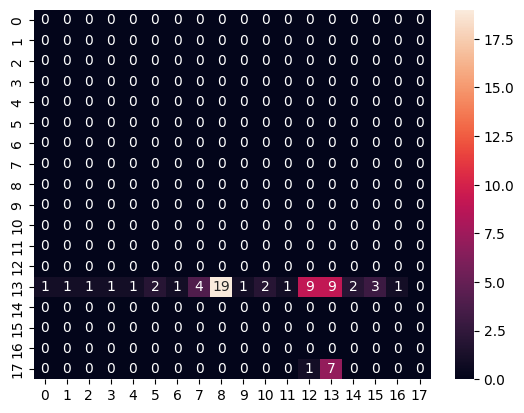

In [ ]:
matriks = confusion_matrix(y_pred, test_Y)
sns.heatmap(matriks, annot=True)

In [ ]:
print('Accuracy: ',round(metrics.accuracy_score(y_pred, test_Y)*100,1), "%")
print('Precision: ',(precision_score(y_pred, test_Y, average='macro')))
print('F1-score: ',(f1_score(y_pred, test_Y, average='macro')))
print('Recall: ',(recall_score(y_pred, test_Y, average='macro')))
print(f'Confusion Matriks:\n{confusion_matrix(y_pred, test_Y)}')

Accuracy:  13.4 %
Precision:  0.03125
F1-score:  0.013333333333333334
Recall:  0.00847457627118644
Confusion Matriks:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  2  1  4 19  1  2  1  9  9  2  3  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
